In [1]:
import pandas as pd
import jellyfish
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('E_B_NoisySet')
df=df.drop(df.columns[[0]] , 1)

In [3]:
import jellyfish
#Hamming Distance    
months = ["January", "April", "June", "August", "September", "November"] 
colnames=list(df.columns.values)
for x in colnames:
    if x!='STD_Months':
        col=x
        print(col)
        df[col+'_Hamming'] = ''
        ix = [(row) for row in range(df[col].shape[0])]
        for row in ix:
            print("row: " , row)
            Hamming_best = 20
            best_match = ''
            for month in months:
                s1 = df[col].iat[row]
                print("s1: " , s1 )
                s2 = month        
                print("s2: " , s2)
                Hd = jellyfish.hamming_distance(s1 , s2)
                print("Hamming Distance :" , Hd)
                if Hd < Hamming_best:
                    Hamming_best = Hd
                    best_match = s2
                df[col+'_Hamming'].iat[row] = best_match
                print('\n')
            print("Best Match: " , best_match)
            print("Hamming_best: " , Hamming_best)        
            print("*******")       

0.1_TypoB
row:  0
s1:  Janary
s2:  January
Hamming Distance : 4


s1:  Janary
s2:  April
Hamming Distance : 6


s1:  Janary
s2:  June
Hamming Distance : 4


s1:  Janary
s2:  August
Hamming Distance : 6


s1:  Janary
s2:  September
Hamming Distance : 9


s1:  Janary
s2:  November
Hamming Distance : 8


Best Match:  January
Hamming_best:  4
*******
row:  1
s1:  Augut
s2:  January
Hamming Distance : 6


s1:  Augut
s2:  April
Hamming Distance : 4


s1:  Augut
s2:  June
Hamming Distance : 4


s1:  Augut
s2:  August
Hamming Distance : 2


s1:  Augut
s2:  September
Hamming Distance : 9


s1:  Augut
s2:  November
Hamming Distance : 8


Best Match:  August
Hamming_best:  2
*******
row:  2
s1:  Janary
s2:  January
Hamming Distance : 4


s1:  Janary
s2:  April
Hamming Distance : 6


s1:  Janary
s2:  June
Hamming Distance : 4


s1:  Janary
s2:  August
Hamming Distance : 6


s1:  Janary
s2:  September
Hamming Distance : 9


s1:  Janary
s2:  November
Hamming Distance : 8


Best Match:  January
Hammi

In [4]:
from sklearn.metrics import accuracy_score

NameOfColumns = list(df)
HammingAccuracy = []
for x in NameOfColumns:
    if "Hamming" in x:
        print("Hamming Accuracy : " , accuracy_score(df["STD_Months"] , df[x])) 
        HammingAccuracy.append(accuracy_score(df["STD_Months"] , df[x]))
print(HammingAccuracy)

Hamming Accuracy :  0.675
Hamming Accuracy :  0.616666666667
Hamming Accuracy :  0.391666666667
Hamming Accuracy :  0.258333333333
Hamming Accuracy :  0.208333333333
Hamming Accuracy :  0.25
Hamming Accuracy :  0.191666666667
[0.67500000000000004, 0.6166666666666667, 0.39166666666666666, 0.25833333333333336, 0.20833333333333334, 0.25, 0.19166666666666668]


In [5]:
import numpy as np
#Creating an empty DataFrame
columns = ['Original']
diff = pd.DataFrame(index=range(0,121) , columns=columns)
diff['Original'] = df['STD_Months']

#Iterate ove the transformed columns 
percentage = [0.1 , 0.2 ,0.3 ,  0.4 , 0.5 , 0.6 , 0.7 ]

for p in percentage:
    """Counting #of wrong transformations"""
    diff['Transformation_' + str(p)] = ''
    c = np.where(df['STD_Months'] != df[ str(p) +'_TypoB_Hamming'])
    
    if len(c[0]) > 0 :    
        for x in np.nditer(c):        
            x = int(x)
            diff['Transformation_' + str(p)].iat[x] = df[ str(p) + '_TypoB_Hamming'].iat[x]
diff     

,Original,Transformation_0.1,Transformation_0.2,Transformation_0.3,Transformation_0.4,Transformation_0.5,Transformation_0.6,Transformation_0.7
0,January,,,June,June,June,June,June
1,August,,,June,June,June,June,June
2,January,,April,June,June,June,June,June
3,November,,,January,April,June,April,June
4,April,,,,,June,,
5,April,,,June,,June,June,June
6,June,,,,,,,
7,November,,January,,June,June,June,June
8,January,,,,June,June,April,June
9,August,,,June,June,June,April,June


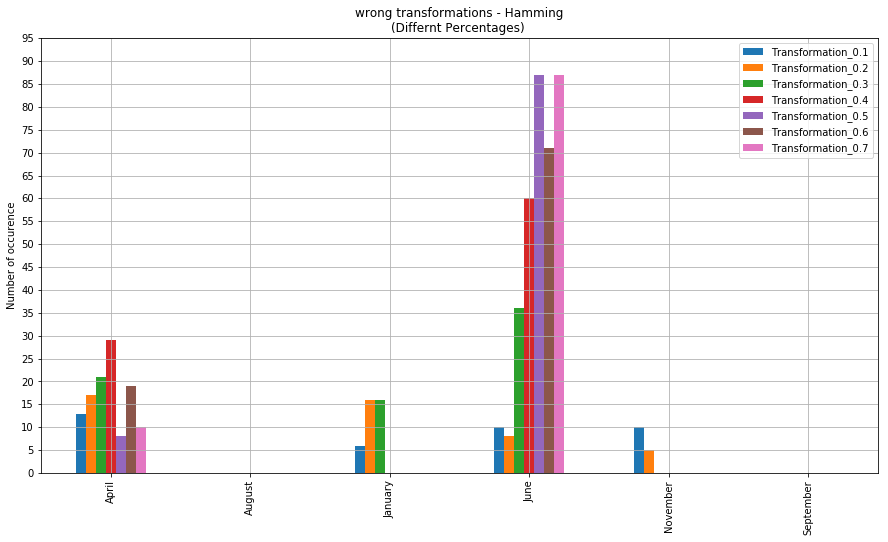

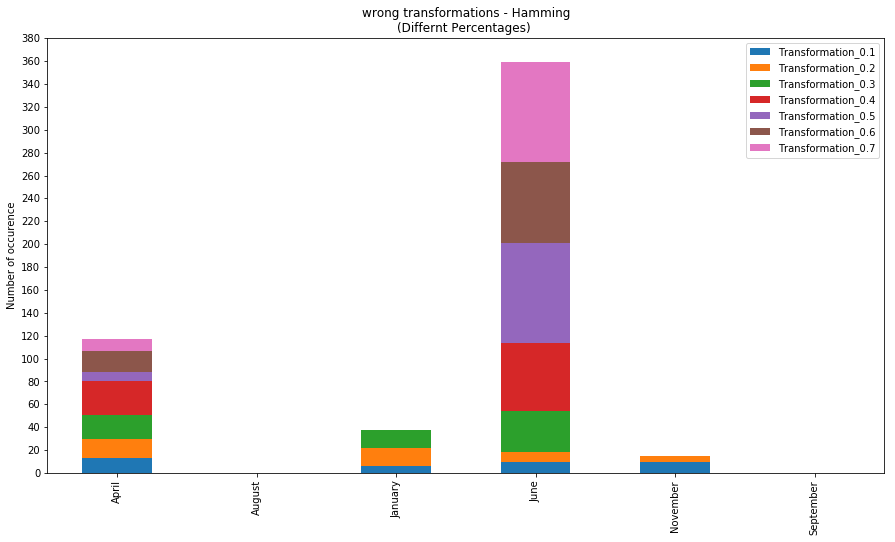

In [7]:
wrong = diff.apply(pd.Series.value_counts)
wrong = wrong.drop(wrong.index[0])
del wrong['Original']
wrong.plot.bar(figsize=(15, 8))
plt.yticks(range(0 , 100 ,5))
plt.ylabel('Number of occurence')
plt.title('wrong transformations - Hamming\n(Differnt Percentages) ')
plt.grid()
wrong.plot.bar(figsize=(15, 8) ,stacked=True)
plt.yticks(range(0 , 400 ,20))
plt.ylabel('Number of occurence')
plt.title('wrong transformations - Hamming\n(Differnt Percentages) ')
plt.show()

In [8]:
#Creating an empty DataFrame
columns = ['Original']
Result = pd.DataFrame(index=range(0,500) , columns=columns)
Result['Noisy Form'] = ''
Result['Transfromation'] = ''

per = [0.1 , 0.2 ,0.3 ,  0.4 , 0.5 ]
#Iterate ove the transformed columns 
for p in per:
    c = np.where(df['STD_Months'] != df[str(p) +'_TypoB_Hamming'])
    
    if(len(c[0])>0):
        print(str(p) + '_TypoB')             
        for ind in np.nditer(c):            
            ind = int(ind)
            x = diff['Original'].iloc[ind]
            y = diff['Transformation_' + str(p)].iloc[ind]
            z = df[str(p) + '_TypoB'].iloc[ind]
            Result['Original'].iloc[ind] = x
            Result['Noisy Form'].iloc[ind] = z
            Result['Transfromation'].iloc[ind] = y                   
            print('{} To {}'.format(x , y))
            print('Noisy form:' , z)
            print('\n')
        print('********') 

0.1_TypoB
November To January
Noisy form: ovember


September To November
Noisy form: Septmber


August To April
Noisy form: Auust


November To January
Noisy form: ovember


January To April
Noisy form: anuary


September To November
Noisy form: Sptember


April To June
Noisy form: pril


April To June
Noisy form: pril


January To June
Noisy form: Jnuary


January To June
Noisy form: Jnuary


August To April
Noisy form: ugust


November To January
Noisy form: ovember


August To April
Noisy form: Agust


January To June
Noisy form: Jnuary


August To April
Noisy form: Agust


November To January
Noisy form: ovember


November To January
Noisy form: ovember


September To November
Noisy form: Sptember


August To April
Noisy form: Agust


September To November
Noisy form: Sptember


August To April
Noisy form: Agust


November To January
Noisy form: ovember


April To June
Noisy form: pril


September To November
Noisy form: Sptember


August To April
Noisy form: ugust


September To 

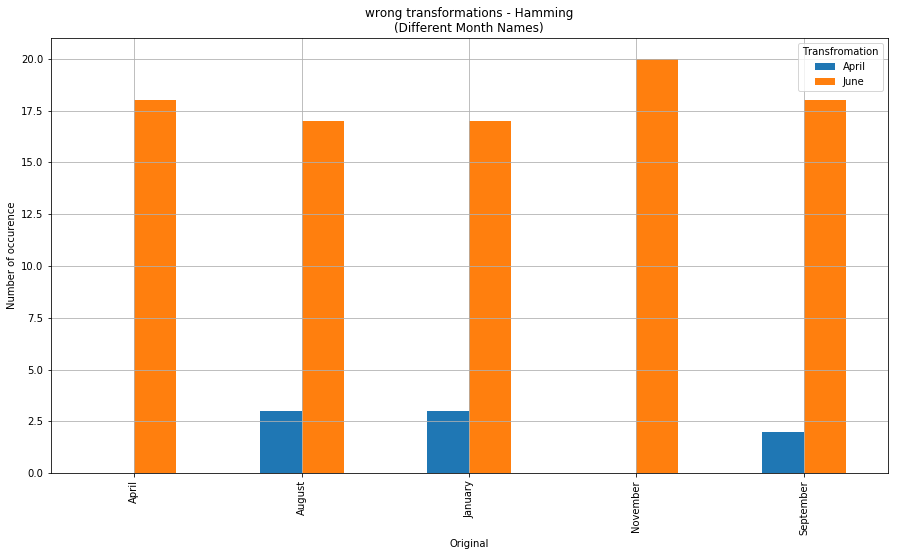

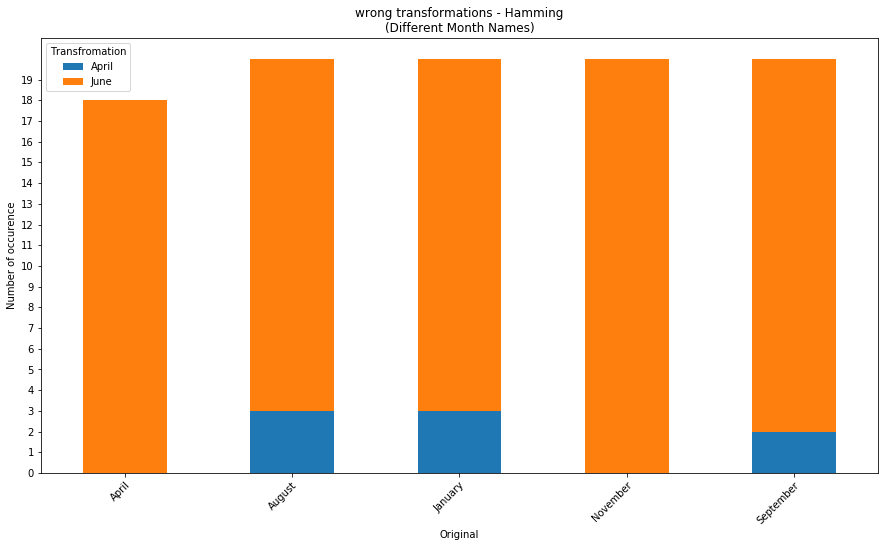

In [9]:
grouped = Result.groupby(['Original' , 'Transfromation'])
new = grouped.size().unstack()
new.plot.bar(figsize=(15, 8))
plt.ylabel('Number of occurence')
plt.title('wrong transformations - Hamming\n(Different Month Names)')
plt.grid()
new.plot.bar(figsize=(15, 8) ,stacked=True)
plt.xticks(rotation='45', rotation_mode='anchor', ha='right')
plt.yticks(range(0 , 20))
plt.ylabel('Number of occurence')
plt.title('wrong transformations - Hamming\n(Different Month Names)')
plt.show()

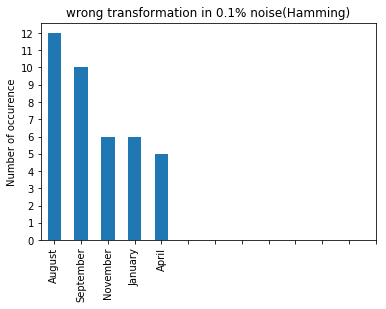

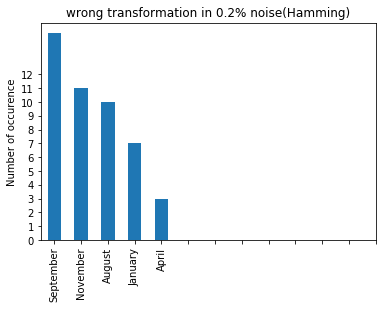

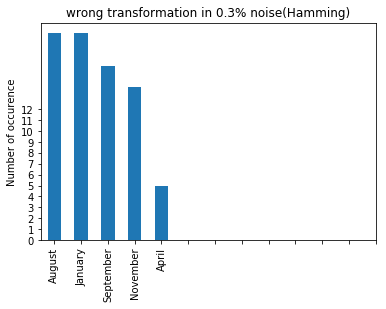

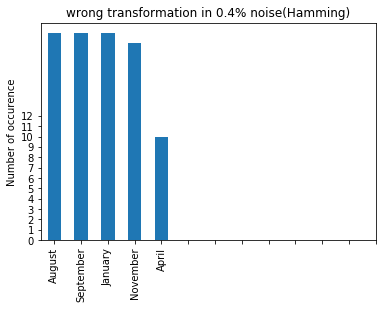

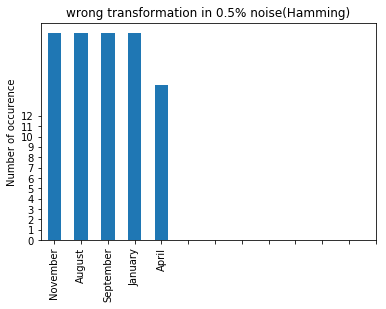

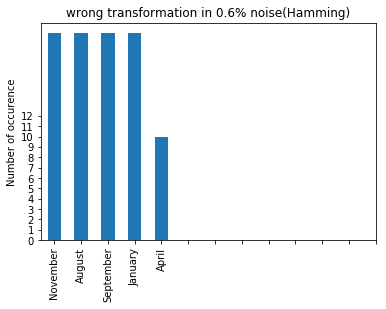

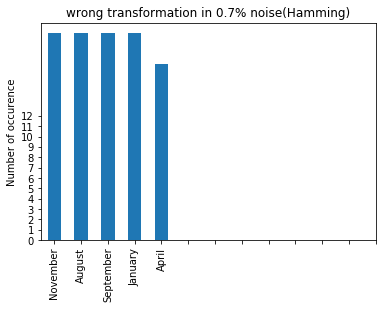

In [10]:
import numpy as np

for p in percentage:
    c = np.where(df['STD_Months'] != df[str(p) +'_TypoB_Hamming'])
    columns = ['Original' , 'Transformation']
    diff = pd.DataFrame(index=range(0,121) , columns=columns)
    diff['Transformation_' + str(p)] = ''
    diff[str(p) + '_TypoB'] = ''
    
    if(len(c[0]>0)):        
        for x in np.nditer(c):
            x = int(x)
            diff['Original'].iat[x] = df['STD_Months'].iat[x]
            diff[str(p) + '_TypoB'].iat[x] = df[str(p) + '_TypoB'].iat[x]
            diff['Transformation'].iat[x] = df[str(p) + '_TypoB_Hamming'].iat[x]
        diff.dropna()
        wrongTransform = diff['Original'].value_counts()
        wrongTransform.plot.bar()
        plt.yticks(range(0 , 13))
        plt.ylabel('Number of occurence')
        plt.title('wrong transformation in {}% noise(Hamming)'.format(p))
        plt.xticks(range(0,13))
        plt.show() 